# **PROJECT 2 - Introduction to Machine Learning and Artificial Intelligence**

Here is the interactive code for the second project. This project deals with the implementation of machine learning algorithms as diagnostic tools in the field of medical science. The dataset used in this project is from UCI ML Breast Cancer Wisconsin (Diagnostic) and is available through the University of Wisconsin-Madison ftp server.

# **Medical Diagnosis**
In the first project, we investigated a machine learning regression application using a multivariate linear regression algorithm to predict the required energy in an industrial process. In this project, we will study a machine learning classification application using a logistic regression algorithm (as a baseline) and a neural network algorithm in the medical field.

Artificial intelligence and particularly machine learning algorithms have many medical applications such as disease diagnosis and treatment. The development of machine learning in healthcare can improve the efficiency and accuracy of medical treatments and significantly reduce the cost of such procedures.

In this project, a diagnosis of breast cancer into malignant and benign tumours will be performed. To do so, a dataset is employed with several numeric features and attributes of the tissue. These features are computed from a digitized medical image of a breast mass.

***There are some optional hints added for each question at the end of this page.***

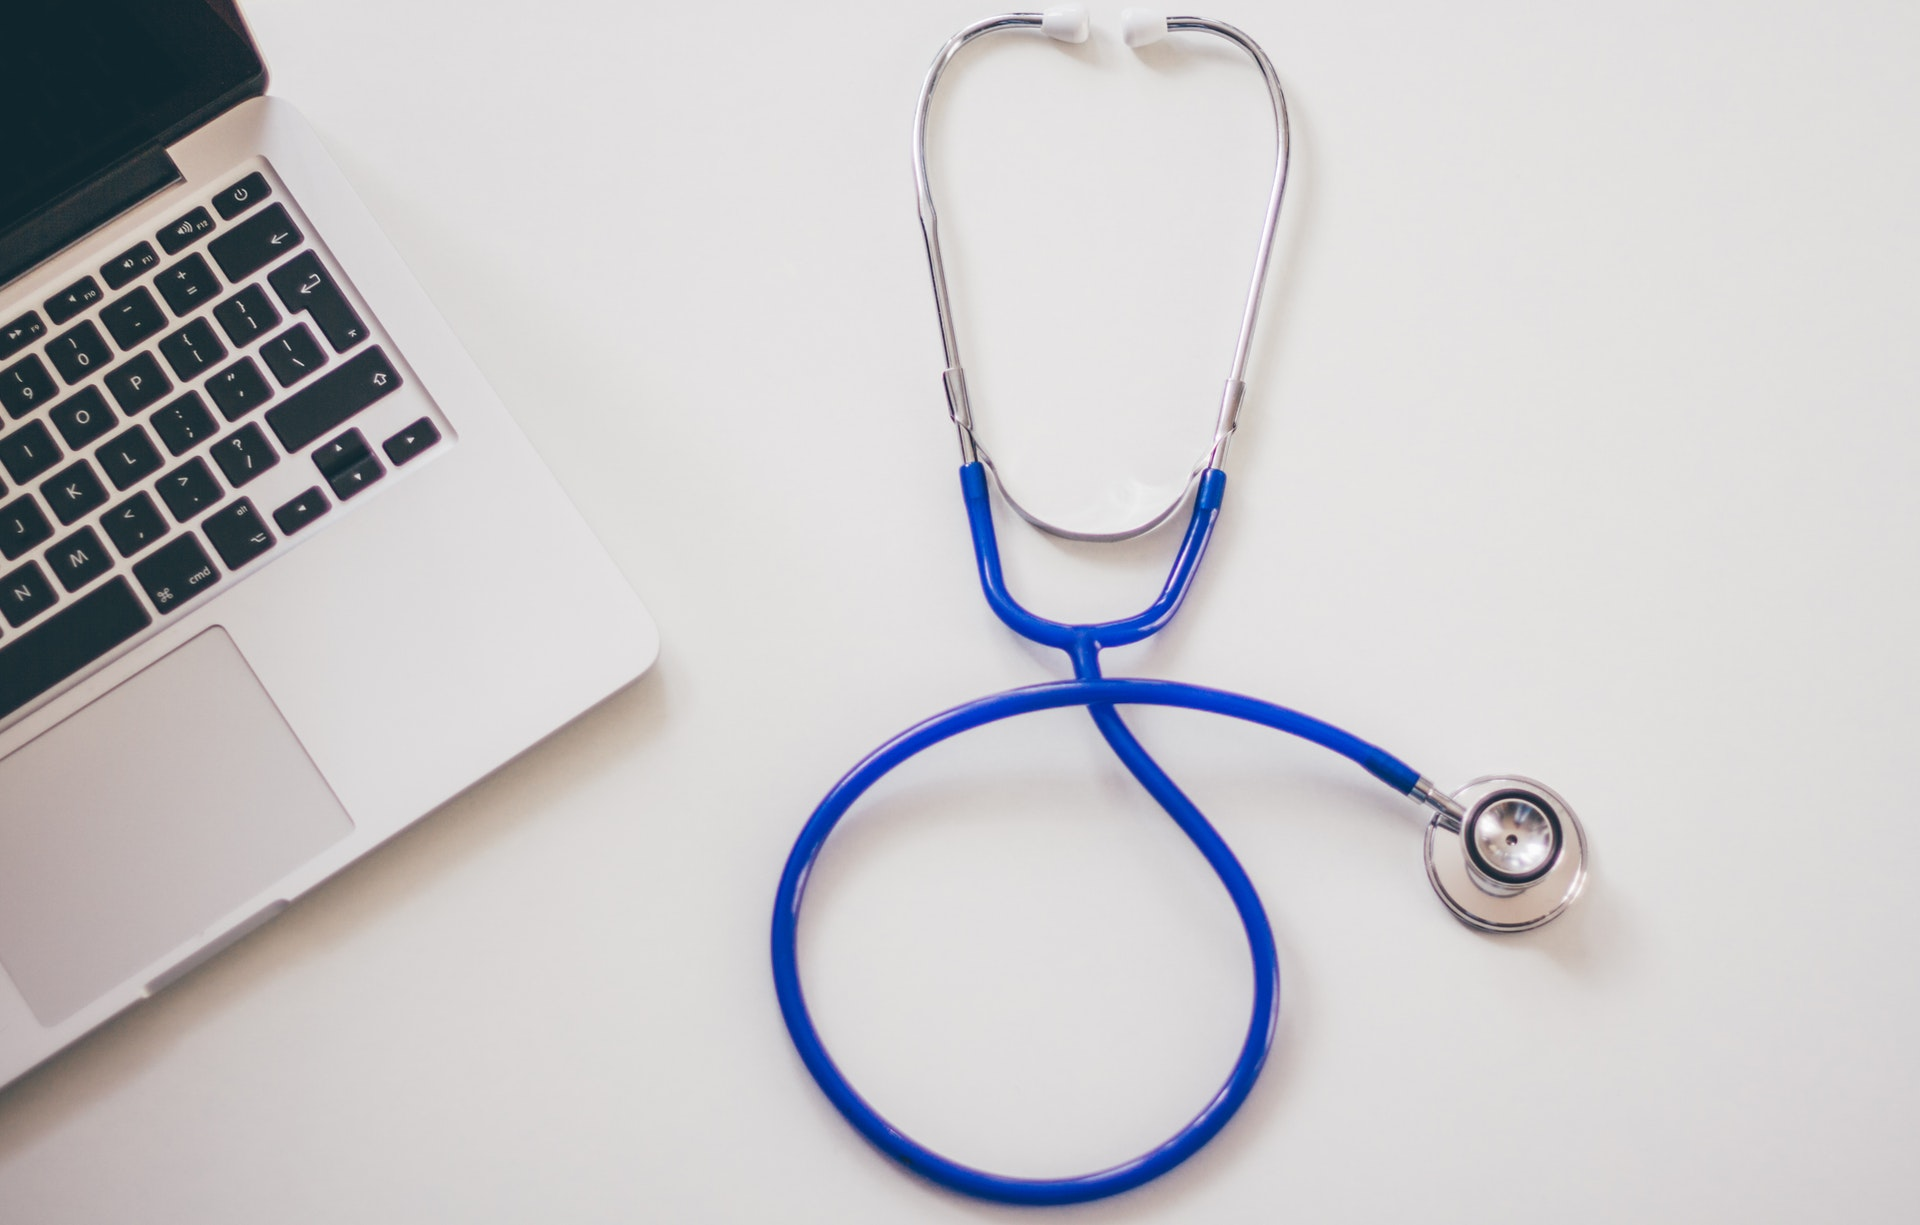

# **Neural Network Classification**
In this project, implementing a neural network for a medical diagnosis is studied.

## Import the TensorFlow
First let's call the TensorFlow,

In [2]:
# Run on TensorFlow 2.x
#%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

## Import relevant modules
Then, we need to import some necessary modules for data preparation, computation, plotting, etc.

In [3]:
#Import relevant modules
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import seaborn as sns

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

print("Imported modules.")

Imported modules.


## Load the dataset
Here we need to load the dataset.

In [28]:
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer()
dataset= pd.DataFrame(df['data'], columns=df['feature_names'])
dataset['target']= df['target']
dataset.columns = dataset.columns.str.replace(' ', '_')

We can also have a glimpse into the dataset,

In [5]:
dataset.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
0,18.0,10.4,122.8,1001.0,0.1,0.3,0.3,0.1,0.2,0.1,...,17.3,184.6,2019.0,0.2,0.7,0.7,0.3,0.5,0.1,0
1,20.6,17.8,132.9,1326.0,0.1,0.1,0.1,0.1,0.2,0.1,...,23.4,158.8,1956.0,0.1,0.2,0.2,0.2,0.3,0.1,0
2,19.7,21.2,130.0,1203.0,0.1,0.2,0.2,0.1,0.2,0.1,...,25.5,152.5,1709.0,0.1,0.4,0.5,0.2,0.4,0.1,0
3,11.4,20.4,77.6,386.1,0.1,0.3,0.2,0.1,0.3,0.1,...,26.5,98.9,567.7,0.2,0.9,0.7,0.3,0.7,0.2,0
4,20.3,14.3,135.1,1297.0,0.1,0.1,0.2,0.1,0.2,0.1,...,16.7,152.2,1575.0,0.1,0.2,0.4,0.2,0.2,0.1,0


The statistics of the dataset such as the number of examples, mean value for each feature, etc. can be obtained as well,

In [6]:
dataset.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
count,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,...,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0
mean,14.1,19.3,92.0,654.9,0.1,0.1,0.1,0.0,0.2,0.1,...,25.7,107.3,880.6,0.1,0.3,0.3,0.1,0.3,0.1,0.6
std,3.5,4.3,24.3,351.9,0.0,0.1,0.1,0.0,0.0,0.0,...,6.1,33.6,569.4,0.0,0.2,0.2,0.1,0.1,0.0,0.5
min,7.0,9.7,43.8,143.5,0.1,0.0,0.0,0.0,0.1,0.0,...,12.0,50.4,185.2,0.1,0.0,0.0,0.0,0.2,0.1,0.0
25%,11.7,16.2,75.2,420.3,0.1,0.1,0.0,0.0,0.2,0.1,...,21.1,84.1,515.3,0.1,0.1,0.1,0.1,0.3,0.1,0.0
50%,13.4,18.8,86.2,551.1,0.1,0.1,0.1,0.0,0.2,0.1,...,25.4,97.7,686.5,0.1,0.2,0.2,0.1,0.3,0.1,1.0
75%,15.8,21.8,104.1,782.7,0.1,0.1,0.1,0.1,0.2,0.1,...,29.7,125.4,1084.0,0.1,0.3,0.4,0.2,0.3,0.1,1.0
max,28.1,39.3,188.5,2501.0,0.2,0.3,0.4,0.2,0.3,0.1,...,49.5,251.2,4254.0,0.2,1.1,1.3,0.3,0.7,0.2,1.0


The correlation between different features and the target (label) is often a good way to establish some understanding about the dataset.

**Question 1:**
Show the correlation among the attributes in the dataset. Then, find the features with having the highest correlation to the target.

In [15]:
# Generate a correlation matrix.
# Write your code between the lines (~ 1 line)
#################################################
# dataset.corr() # for entire corr() matrix
print(dataset.corr()["target"].to_string()) # smoothness_error 0.1
#################################################

mean_radius               -0.7
mean_texture              -0.4
mean_perimeter            -0.7
mean_area                 -0.7
mean_smoothness           -0.4
mean_compactness          -0.6
mean_concavity            -0.7
mean_concave_points       -0.8
mean_symmetry             -0.3
mean_fractal_dimension     0.0
radius_error              -0.6
texture_error              0.0
perimeter_error           -0.6
area_error                -0.5
smoothness_error           0.1
compactness_error         -0.3
concavity_error           -0.3
concave_points_error      -0.4
symmetry_error             0.0
fractal_dimension_error   -0.1
worst_radius              -0.8
worst_texture             -0.5
worst_perimeter           -0.8
worst_area                -0.7
worst_smoothness          -0.4
worst_compactness         -0.6
worst_concavity           -0.7
worst_concave_points      -0.8
worst_symmetry            -0.4
worst_fractal_dimension   -0.3
target                     1.0


## Separate input features and targets
As in this case we are dealing with a classification problem, therefore, the discrete target values are not in fact algebraic quantities. Therefore, we shouldn't normalize the *targets* unlike what we did for the regression problem in the previous project.



**Question 2:**
Separate the dataset into the input features (`X_dataset`) and the output target (`y_dataset`).

In [34]:
# Split the dataset into input features and the output target.
# Write your code between the lines (~ 2 line)
#################################################
y_dataset = dataset[["target"]]
X_dataset = dataset.iloc[:, :-1]
#################################################
print("Dataset separated.")

Dataset separated.


## Normalize values
As in the previous project, the values of different features should range roughly similar. Therefore, normalizing the input features might be a necessary step before building the model. Here we calculate the Z-score for each input feature column.

**Question 3:** Find the normalized input features. Note that in this classification case, we only normalize the input features.

In [37]:
# Convert raw values to their Z-scores
# Calculate the Z-scores of each input feature column.
# Write your code between the lines (~ 3 lines)
#################################################
X_dataset_mean = X_dataset.mean()
X_dataset_std = X_dataset.std()
X_dataset_norm = (X_dataset - X_dataset_mean)/X_dataset_std
#################################################
print("Dataset normalized.")

Dataset normalized.


## Split the dataset
At this stage, we should split the dataset into the training set and the validation/test set. Therefore, we would have input features and their corresponding targets both for training and validation/test sets.

**Question 4:**
Split the dataset into the training set (90%) and validation/test set (10%). Make sure that the random state is set to 110 or `random_state=110` for reproducibility.

In [38]:
from sklearn.model_selection import train_test_split

# Split the dataset into the training set (90%) and the test set (10%).
# Write your code between the lines (~ 1 line)
#################################################
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.9, test_size=0.1, random_state=110)
#################################################
print("Dataset split.")

Dataset split.


## The plotting function
Here we define the plotting function.

In [39]:
# Define the plotting function
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more metrics vs. epoch."""  
  

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Loaded the plot_curve function.")

Loaded the plot_curve function.


## Define a logistic regression model as a baseline
A logistic regression model can be used as a baseline for the neural network. Here we define the function to create and train a logistic regression model.

**Question 5:**
Add the last layer to create the logistic regression function and select the suitable activation function.

In [42]:
# Define functions to create and train a logistic regression model
def create_LR_model(learning_rate):
  """Create and compile a logistic regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add a layer to the model to yield a sigmoid function.
  # Write your code between the lines (~ 1 line)
  #################################################
  model.add(tf.keras.layers.Dense(units=1 , activation='sigmoid'))
  #################################################

  # Construct the layers into a model that TensorFlow can execute.
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
                loss="binary_crossentropy",
                metrics=[tf.keras.metrics.BinaryAccuracy()])

  return model           


def train_LR_model(model, train_features, train_label, epochs, batch_size=None):
  """Feed a dataset into the model in order to train it."""
  
  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=False)

  # Get details that will be useful for plotting the loss curve.
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist

print("Defined the create_model and train_model functions.")

Defined the create_model and train_model functions.


## Build and train the logistic regression model
The following code invokes the defined functions to train the logistic regression model.

Epoch 1/100


/Users/kevinrasmusson/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 0s 2ms/step - loss: 93.0675 - binary_accuracy: 0.6230
Epoch 2/100
3/3 [==============================] - 0s 2ms/step - loss: 61.0875 - binary_accuracy: 0.6230
Epoch 3/100
3/3 [==============================] - 0s 2ms/step - loss: 29.2774 - binary_accuracy: 0.6289
Epoch 4/100
3/3 [==============================] - 0s 3ms/step - loss: 4.5415 - binary_accuracy: 0.7715
Epoch 5/100
3/3 [==============================] - 0s 3ms/step - loss: 9.2505 - binary_accuracy: 0.4062
Epoch 6/100
3/3 [==============================] - 0s 3ms/step - loss: 15.5058 - binary_accuracy: 0.3730
Epoch 7/100
3/3 [==============================] - 0s 3ms/step - loss: 13.1462 - binary_accuracy: 0.3730
Epoch 8/100
3/3 [==============================] - 0s 3ms/step - loss: 5.5205 - binary_accuracy: 0.4863
Epoch 9/100
3/3 [==============================] - 0s 3ms/step - loss: 1.6498 - binary_accuracy: 0.8652
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss:

3/3 [==============================] - 0s 1ms/step - loss: 0.5370 - binary_accuracy: 0.9102
Epoch 80/100
3/3 [==============================] - 0s 1ms/step - loss: 0.5344 - binary_accuracy: 0.9121
Epoch 81/100
3/3 [==============================] - 0s 2ms/step - loss: 0.5317 - binary_accuracy: 0.9121
Epoch 82/100
3/3 [==============================] - 0s 2ms/step - loss: 0.5292 - binary_accuracy: 0.9121
Epoch 83/100
3/3 [==============================] - 0s 2ms/step - loss: 0.5267 - binary_accuracy: 0.9121
Epoch 84/100
3/3 [==============================] - 0s 1ms/step - loss: 0.5242 - binary_accuracy: 0.9121
Epoch 85/100
3/3 [==============================] - 0s 1ms/step - loss: 0.5216 - binary_accuracy: 0.9121
Epoch 86/100
3/3 [==============================] - 0s 2ms/step - loss: 0.5190 - binary_accuracy: 0.9121
Epoch 87/100
3/3 [==============================] - 0s 1ms/step - loss: 0.5164 - binary_accuracy: 0.9121
Epoch 88/100
3/3 [==============================] - 0s 1ms/step - lo

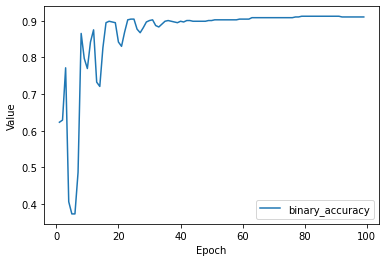

In [43]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 100
batch_size = 200

# Establish the model's topography.
model_1 = create_LR_model(learning_rate)

# Train the model on the normalized training set.
epochs, hist = train_LR_model(model_1, X_train_norm, y_train, epochs, batch_size)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['binary_accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

**Question 6:**
After training, evaluate the performance of the logistic regression model against the test set. To do so, run the following cell and report the `binary_accuracy`.

In [44]:
# Evaluate the trained model against the test set.
print("\n Evaluate the logistic regression model against the test set:")
model_1.evaluate(x = X_test_norm, y = y_test)


 Evaluate the logistic regression model against the test set:
2/2 [==============================] - 0s 2ms/step - loss: 0.6483 - binary_accuracy: 0.8596


[0.6483106017112732, 0.859649121761322]

## Define a neural network model
In here, we define a neural network model by specifying the number of layers and nodes, activation functions and optimization methods. Next, the train function is defined.

**Question 7:**
Complete the code and define two more hidden layers with 8 and 6 nodes respectively. Set the `activation` as relu and the `kernel_regularizer` as `l2` with `l=0.001`.

## Build and train the neural network model
Finally, all the related functions are called to train the neural network. In addition, the hyperparameters including the learning rate, number of epochs and batch size are assigned here as well.

In [48]:
def create_NN_model(learning_rate):
  """Create and compile a neural network model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Define the first hidden layer with 16 nodes.   
  model.add(tf.keras.layers.Dense(units=16, 
                                  activation='relu',
                                  kernel_regularizer=tf.keras.regularizers.l2(l=0.001),
                                  name='Hidden1'))
  
  # Write your code between the lines (~ few lines)
  #################################################  
  # Define the second hidden layer with 8 nodes.   
  model.add(tf.keras.layers.Dense(units=8, 
                                  activation='relu', 
                                  kernel_regularizer=tf.keras.regularizers.l2(l=0.001), 
                                  name='Hidden2'))
  
  
  # Define the third hidden layer with 6 nodes.
  model.add(tf.keras.layers.Dense(units=6, 
                                  activation='relu', 
                                  kernel_regularizer=tf.keras.regularizers.l2(l=0.001), 
                                  name='Hidden3'))

  
  #################################################
  
  # Define the output layer.
  model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))                              
  
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
                loss="binary_crossentropy",
                metrics=[tf.keras.metrics.BinaryAccuracy()])

  return model

def train_NN_model(model, train_features, train_label, epochs, batch_size=None):
    """Feed a dataset into the model in order to train it."""

    history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=False)

    # Get details that will be useful for plotting the loss curve.
    epochs = history.epoch
    hist = pd.DataFrame(history.history)

    return epochs, hist

print("Defined the create_model and train_model functions.")

Defined the create_model and train_model functions.


Epoch 1/100


/Users/kevinrasmusson/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 0s 2ms/step - loss: 4.1916 - binary_accuracy: 0.5078
Epoch 2/100
3/3 [==============================] - 0s 2ms/step - loss: 0.7157 - binary_accuracy: 0.6270
Epoch 3/100
3/3 [==============================] - 0s 2ms/step - loss: 0.7027 - binary_accuracy: 0.6309
Epoch 4/100
3/3 [==============================] - 0s 3ms/step - loss: 0.6856 - binary_accuracy: 0.6191
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6647 - binary_accuracy: 0.6348
Epoch 6/100
3/3 [==============================] - 0s 3ms/step - loss: 0.6659 - binary_accuracy: 0.6953
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6316 - binary_accuracy: 0.6836
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6100 - binary_accuracy: 0.6914
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 0.5737 - binary_accuracy: 0.7285
Epoch 10/100
3/3 [==============================] - 0s 3ms/step - loss: 0.53

3/3 [==============================] - 0s 2ms/step - loss: 0.1870 - binary_accuracy: 0.9355
Epoch 80/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1866 - binary_accuracy: 0.9355
Epoch 81/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1864 - binary_accuracy: 0.9336
Epoch 82/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1860 - binary_accuracy: 0.9336
Epoch 83/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1858 - binary_accuracy: 0.9336
Epoch 84/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1854 - binary_accuracy: 0.9336
Epoch 85/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1852 - binary_accuracy: 0.9336
Epoch 86/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1849 - binary_accuracy: 0.9336
Epoch 87/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1847 - binary_accuracy: 0.9336
Epoch 88/100
3/3 [==============================] - 0s 5ms/step - lo

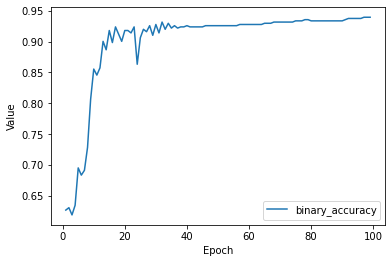

In [49]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 100
batch_size = 200

# Establish the model's topography.
model_2 = create_NN_model(learning_rate)

# Train the model on the normalized training set.
epochs, hist = train_NN_model(model_2, X_train_norm, y_train, epochs, batch_size)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['binary_accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

**Question 8:**
Evaluate the performance of the neural network model against the test set. To do so, run the following cell and report the `binary_accuracy`.

In [50]:
# Evaluate the trained model against the test set.
print("\n Evaluate the neural network model against the test set:")
model_2.evaluate(x = X_test_norm, y = y_test)


 Evaluate the neural network model against the test set:
2/2 [==============================] - 0s 2ms/step - loss: 0.2154 - binary_accuracy: 0.8246


[0.21540695428848267, 0.8245614171028137]

**Question 9:**
Which model did perform better against the test set in predicting the output. Moreover, is there any overfitting observed for either the logistic regression model or the neural network? Motivate your answer.

## Optional hints
If you need assistance, you may click on the cell below to see the hints for each question.

In [ ]:
#@title Hints

# Question 1: To find the correlation matrix, you can use the same command as in
# the first project.

# Question 2: To separate the last column (target) of the dataset, you can use
# the pandas command "DataFrame.pop(item)".
# For more information:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pop.html

# Question 3: To normalize the input features, you can use the same formula as
# in the first project.

# Question 4: To split the dataset into the training set and the test set, you
# can use the sklearn command "sklearn.model_selection.train_test_split(...)".
# Make sure that the random state is set as "random_state=110".
# For more information:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# Question 5: You need to add the final layer in this case for a logistic regression
# model. You can use the following command and set the arguments units and
# activation accordingly.
# model.add(tf.keras.layers.Dense(units=... , activation='...'))
# For more information:
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
# https://keras.io/api/layers/activations/

# Question 6: Self-explanatory!

# Question 7: You need to add two more hidden layers to your neural network model.
# It would be very similar to the provided first hidden layer. Only remember to
# set the number of units to 8 for the second hidden layer and 6 for the third
# hidden layer. Also set the activation functions to "relu" and implement the
# regularization term exactly as the first hidden layer.
# For more information:
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

# Question 8: Self-explanatory!

# Question 9: The comparison between performance of the two models (i.e. the logistic
# regression and the neural network) is simply done based on the evaluations on
# the test set. Furthermore, to check the overfitting, compare the accuracy at
# the last epoch during the training vs the accuracy against the test set for
# each model separately.

# Best of luck!
